In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Load the uploaded CSV file
file_path = '/home/ezradin/pred-sentencing/results/pairs_similarity/2024-09-07_qa_din_testss/train_case_sim.csv'
df = pd.read_csv(file_path)


In [63]:

data_cleaned = df.drop(columns=['source', 'target', 'OBTAIN_WAY', 'Unnamed: 0'])
data_cleaned['label'] = data_cleaned['label'].apply(lambda x: 1 if x >= 3 else 0)
data_cleaned.rename(columns={'סוג עבירה': 'OfFENSE TYPE'}, inplace=True)

data_cleaned.head()


,HELD_WAY,STATUS_WEP,TYPE_WEP,OfFENSE TYPE,USE,PURPOSE,label
0,-2.000000,0.0,0.0,0.000000,1.0,-2.0,0
1,0.666667,0.0,1.0,0.666667,1.0,-2.0,1
2,1.000000,1.0,1.0,1.000000,1.0,1.0,1
3,0.400000,0.0,0.0,1.000000,1.0,-2.0,1
4,0.000000,1.0,1.0,0.500000,1.0,-2.0,0


In [64]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Split the data into features (X) and target (y)
X = data_cleaned.drop(columns=['label'])
y = data_cleaned['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test = np.ceil(X_test)
y_test = np.ceil(y_test)
# Define a grid of hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
#                            cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

best_param =  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

model = RandomForestClassifier(**best_param, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [65]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81        24
         1.0       0.77      0.81      0.79        21

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.80      0.80      0.80        45



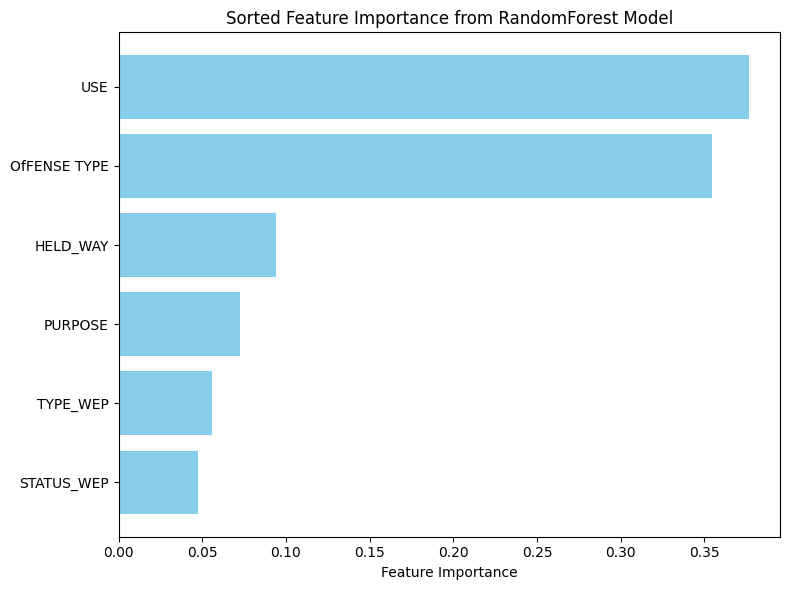

In [66]:
import matplotlib.pyplot as plt

# Get feature importances from the RandomForest model
importances = model.feature_importances_
feature_names = X.columns

# Sorting the feature importances in descending order for better visualization
sorted_idx = importances.argsort()
sorted_feature_names = feature_names[sorted_idx]
sorted_importances = importances[sorted_idx]

# Plotting the sorted feature importances
plt.figure(figsize=(8, 6))
plt.barh(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Sorted Feature Importance from RandomForest Model')
plt.tight_layout()

# Display the plot
plt.show()
